In [1]:
import sys
import time

sys.path.append("..")
import uniplot as up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import solv_fzcp as sfzcp
import uvarprob as uvpr

In [2]:
test_file = "../test_casado.csv"
# test_file = "../tst1.csv"

In [3]:
# Maximal number of steps
max_steps = 1e6
# Tolerance
epsilon = 1e-2
# If True - global Lipschitz constant is used
global_lipschitz_interval = True
# If True - the record value is taken from the test database
known_record = False
# How many points to skip in vizualization - regular step
skip = 1000
# The size of the legend in plots
legend_size = 2

In [4]:
def read_problems(fname):
    data = pd.read_csv(fname, index_col='name', comment='#')
    return data

In [5]:
df = read_problems(test_file)
df

,objective,a,b,min_f,min_x
name,,,,,
1,-0.5*x^2*(log(x))+5,0.2,7.0,0,0
2,-exp(-x)*sin(2*pi*x)+1,0.2,7.0,0,0
3,-(sqrt(x))*sin(x)+1,0.2,7.0,0,0
4,x*sin(x)+sin(10.0*x/3.0)+log(x)-0.84*x+1.3,0.2,7.0,0,0
5,x+sin(5.0*x),0.2,7.0,0,0
6,-x*sin(x)+5,0.2,7.0,0,0
7,sin(x)*cos(x)-1.5*(sin(x))^2.0+1.2,0.2,7.0,0,0
8,2*cos(x)+cos(2*x)+5,0.2,7.0,0,0
9,2.0*sin(x)*exp(-x),0.2,7.0,0,0


In [6]:
points_db = {}
psl_lipint_points_list = []
psl_lip_points_list = []
psqe_lipint_points_list = []
psqe_lip_points_list = []
bnb2_lipint_points_list = []
bnb2_lip_points_list = []

In [7]:
def log_point(x, points_list):
    points_list.append(x)

In [8]:
from FZCP.test import test_last

test_last(df, 1e-4, repeat=100, global_lip=False)

test.Index,IBB,PL_N,PI_N,QL_N,QI_N,PL_R,PI_R,QL_R,QI_R
1 & 0.140 & 0.314 & 0.267 & 0.201 & 0.194 & 0.154 & 0.137 & 0.047 & 0.043 \\
2 & 0.020 & 0.420 & 0.396 & 0.346 & 0.350 & 0.174 & 0.165 & 0.225 & 0.222 \\
3 & 0.143 & 0.328 & 0.311 & 0.196 & 0.191 & 0.146 & 0.142 & 0.104 & 0.100 \\
4 & 0.378 & 0.463 & 0.412 & 0.338 & 0.276 & 0.221 & 0.182 & 0.162 & 0.128 \\
5 & 0.169 & 0.228 & 0.175 & 0.182 & 0.175 & 0.093 & 0.087 & 0.074 & 0.073 \\
6 & 0.030 & 0.104 & 0.090 & 0.065 & 0.059 & 0.052 & 0.050 & 0.057 & 0.054 \\
7 & 0.270 & 0.247 & 0.230 & 0.241 & 0.239 & 0.136 & 0.132 & 0.089 & 0.085 \\
8 & 0.018 & 0.071 & 0.058 & 0.053 & 0.048 & 0.042 & 0.040 & 0.055 & 0.054 \\
9 & 0.134 & 1.569 & 1.537 & 0.264 & 0.259 & 0.597 & 0.596 & 0.153 & 0.151 \\
10 & 0.299 & 1.789 & 1.770 & 0.373 & 0.326 & 0.658 & 0.647 & 0.199 & 0.192 \\
11 & 0.757 & 17.721 & 9.365 & 2.082 & 1.105 & 9.604 & 4.277 & 0.912 & 0.427 \\
12 & 0.020 & 0.566 & 0.545 & 0.430 & 0.254 & 0.196 & 0.191 & 0.219 & 0.182 \\
13 & 1.018 & 0.59

In [9]:
for test in df.itertuples():
    print(test.Index)
    points_db[test.Index] = {'psl_lipint_points_list': [], 'psl_lip_points_list': [], 'psqe_lipint_points_list': [],
                             'psqe_lip_points_list': [], 'bnb2_pslint_points_list': [], 'bnb2_psl_points_list': [],
                             'bnb2_lipint_points_list': [],
                             'bnb2_lip_points_list': []}

    # #
    # T1 = time.perf_counter()
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
    #                           lambda x: log_point(x, points_db[test.Index]['bnb2_psl_points_list']))
    # print('Piyavskii, Lipschitz constant:',
    #       sfzcp.new_method(prob, symm=True, epsilon=1e-5, global_lipschitz_interval=False, estimator=1))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)
    #
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
    #                           lambda x: log_point(x, points_db[test.Index]['bnb2_pslint_points_list']))
    # period = 0
    # T1 = time.perf_counter()
    # print('Piyavskii, Lipschitz interval:',
    #       sfzcp.correctly(prob, symm=False, epsilon=1e-10, global_lipschitz_interval=False, estimator=1, reduction=1,
    #                        period_comp_lip=period))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1)*1000, 'period:', period)
    #
    # T1 = time.perf_counter()
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
    #                           lambda x: log_point(x, points_db[test.Index]['bnb2_lip_points_list']))
    # print('PSQE, Lipschitz constant:',
    #       sfzcp.new_method(prob, symm=True, epsilon=1e-5, global_lipschitz_interval=False, estimator=2))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)

    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_lipint_points_list']), True)
    # 
    # period = 0
    # T1 = time.perf_counter()
    # print('PSQE, Lipschitz interval:',
    #       sfzcp.new_method(prob, symm=False, epsilon=1e-10, global_lipschitz_interval=False, estimator=2, reduction=1,
    #                        period_comp_lip=period))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1)*1000, 'period:', period)
    T1 = time.perf_counter()
    print('QI_R:',
          sfzcp.new_method(prob, symm=False, epsilon=1e-4, global_lipschitz_interval=False, estimator=2, reduction=1))
    T2 = time.perf_counter()
    print('time=', (T2 - T1) * 1000)
    T1 = time.perf_counter()
    print('PL_N:',
          sfzcp.new_method(prob, symm=True, epsilon=1e-4, global_lipschitz_interval=False, estimator=1, reduction=0))
    T2 = time.perf_counter()
    print('time=', (T2 - T1) * 1000)
    T1 = time.perf_counter()
    print('IBB:',
          sfzcp.cas(prob=prob, sym=True, epsilon=(test.b - test.a) * (1e-4)))
    T2 = time.perf_counter()
    print('time=', (T2 - T1) * 1000)

1
QI_R: TestResult(nsteps=3, first_crossing_zero_point=[([3.012, 3.012], 'certain')])
time= 0.44454203452914953
PL_N: TestResult(nsteps=71, first_crossing_zero_point=[([3.012, 3.012], 'uncertain'), ([3.012, 3.012], 'uncertain'), ([3.012, 3.012], 'certain')])
time= 0.7829169626347721
IBB: TestResult(nsteps=15, first_crossing_zero_point=[3.01191228648539])
time= 0.1878330367617309
2
QI_R: TestResult(nsteps=17, first_crossing_zero_point=[])
time= 0.33587502548471093
PL_N: TestResult(nsteps=67, first_crossing_zero_point=[])
time= 0.4649590118788183
IBB: TestResult(nsteps=1, first_crossing_zero_point=[])
time= 0.025833025574684143
3
QI_R: TestResult(nsteps=7, first_crossing_zero_point=[([1.175, 1.175], 'certain')])
time= 0.26783300563693047
PL_N: TestResult(nsteps=71, first_crossing_zero_point=[([1.175, 1.175], 'uncertain'), ([1.175, 1.175], 'uncertain'), ([1.175, 1.175], 'certain')])
time= 0.4736660048365593
IBB: TestResult(nsteps=17, first_crossing_zero_point=[1.1745957929141488])
time= 0

In [12]:
print('test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R')
eps = 1e-7
min_list = (float('inf'),) * 8
max_list = (0,) * 8
sum_list = (0,) * 8
for test in df.itertuples():
    points_db[test.Index] = {'bnb2_pslint_points_list': []}
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_pslint_points_list']))
    T1 = time.perf_counter()
    PC_N = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=False).nsteps
    T2 = time.perf_counter()
    time_PC_N = T2 - T1
    min_list[0] = min(min_list[0], T2 - T1)
    max_list[0] = max(max_list[0], T2 - T1)
    sum_list[0] += T2 - T1
    T1 = time.perf_counter()
    PI_N = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=False).nsteps
    T2 = time.perf_counter()
    time_PI_N = T2 - T1
    min_list[1] = min(min_list[1], T2 - T1)
    max_list[1] = max(max_list[1], T2 - T1)
    sum_list[1] += T2 - T1
    T1 = time.perf_counter()
    QC_N = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=False).nsteps
    T2 = time.perf_counter()
    time_QC_N = T2 - T1
    min_list[2] = min(min_list[2], T2 - T1)
    max_list[2] = max(max_list[2], T2 - T1)
    sum_list[2] += T2 - T1
    T1 = time.perf_counter()
    QI_N = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=False).nsteps
    T2 = time.perf_counter()
    time_QI_N = T2 - T1
    min_list[3] = min(min_list[3], T2 - T1)
    max_list[3] = max(max_list[3], T2 - T1)
    sum_list[3] += T2 - T1
    T1 = time.perf_counter()
    PC_R = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=True).nsteps
    T2 = time.perf_counter()
    time_PC_R = T2 - T1
    min_list[4] = min(min_list[4], T2 - T1)
    max_list[4] = max(max_list[4], T2 - T1)
    sum_list[4] += T2 - T1
    T1 = time.perf_counter()
    PI_R = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=True).nsteps
    T2 = time.perf_counter()
    time_PI_R = T2 - T1
    min_list[5] = min(min_list[5], T2 - T1)
    max_list[5] = max(max_list[5], T2 - T1)
    sum_list[5] += T2 - T1
    T1 = time.perf_counter()
    QC_R = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=True).nsteps
    T2 = time.perf_counter()
    time_QC_R = T2 - T1
    min_list[6] = min(min_list[6], T2 - T1)
    max_list[6] = max(max_list[6], T2 - T1)
    sum_list[6] += T2 - T1
    T1 = time.perf_counter()
    QI_R = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=True).nsteps
    T2 = time.perf_counter()
    time_QI_R = T2 - T1
    min_list[7] = min(min_list[7], T2 - T1)
    max_list[7] = max(max_list[7], T2 - T1)
    sum_list[7] += T2 - T1

    # print('%s & %d & %d & %d & %d & %d & %d & %d & %d \\\\' %(test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R))
    print('%s & %.5f & %.5f & %.5f & %.5f & %.5f & %.5f & %.5f & %.5f \\\\' % (
        test.Index, time_PC_N, time_PI_N, time_QC_N, time_QI_N, time_PC_R, time_PI_R, time_QC_R, time_QI_R))

test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R
0.911152374259570


TypeError: 'tuple' object does not support item assignment

In [ ]:
print('test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R')
eps = 1e-7
for test in df.itertuples():
    points_db[test.Index] = {'bnb2_pslint_points_list': []}
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_pslint_points_list']))
    PC_N = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=False).nsteps

    PI_N = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=False).nsteps
    QC_N = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=False).nsteps
    QI_N = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=False).nsteps

    PC_R = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=True).nsteps
    PI_R = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=True).nsteps
    QC_R = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=True).nsteps
    QI_R = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=True).nsteps

    print('%s & %d & %d & %d & %d & %d & %d & %d & %d \\\\' % (
        test.Index, PC_N, PI_N, QC_N, QI_N, PC_R, PI_R, QC_R, QI_R))
    # P: Piyavskii estimator
    # Q: Piecewise smooth quadratic estimator
    # C: Lipschitz constant
    # I: Lipschitz interval
    # N: without reduction
    # R: with reduction

In [9]:
def vis_trials(points_list, num_series, base_level):
    poix = np.array(list(set(points_list[::skip])))
    poiy = np.full(len(poix), base_level + num_series * -0.5)
    up.plot_points(poix, poiy, num_series)

Pandas(Index='benchmark1', objective='1./(7.26231 * (10. * x - 1.34364)^2 + 0.25275) + 1./(3.96356 * (10. * x - 2.55069)^2 + 0.1899) + 1./(6.64323 * (10. * x - 6.51593)^2 + 0.11877) + 1./(7.13707 * (10. * x - 0.28347)^2 + 0.18655) + 1./(1.00844 * (10. * x - 7.6228)^2 + 0.18908) + 1./(2.12438 * (10. * x - 7.2154)^2 + 0.28905) + 1./(1.1261 * (10. * x - 9.01427)^2 + 0.10509) + 1./(8.2846 * (10. * x - 5.41412)^2 + 0.17624) + 1./(3.4012 * (10. * x - 2.16599)^2 + 0.10581) + 1./(3.51853 * (10. * x - 2.21692)^2 + 0.19916)-7', a=0, b=1, min_f=0, min_x=0)


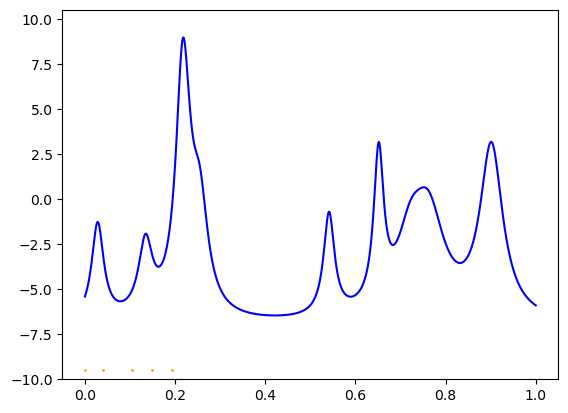

Pandas(Index='benchmark2', objective='x^3+2.*x+cos(10.*x)', a=-3, b=3, min_f=0, min_x=0)


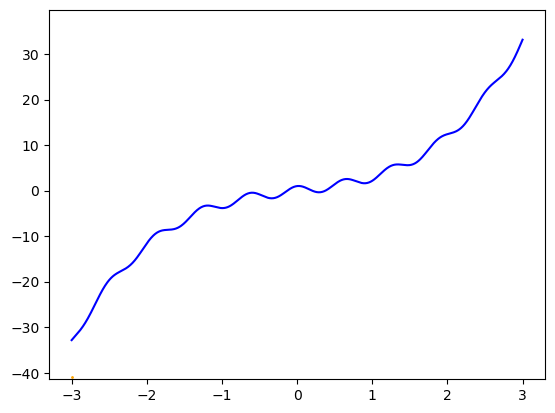

Pandas(Index='benchmark3', objective='(3.0-x)*(x-1.0)^2', a=0, b=4, min_f=0, min_x=0)


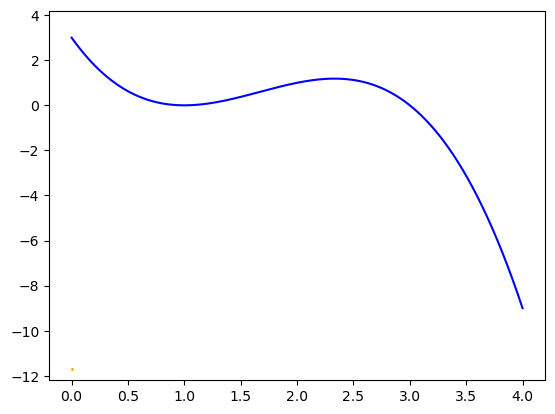

In [10]:
for test in df.itertuples():
    print(test)
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x)
    up.plot_problem(prob, {'function': 'b-'}, legend=legend_size)
    vis_trials(points_db[test.Index]['bnb2_psl_points_list'], 0, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['bnb2_pslint_points_list'], 1, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['bnb2_lip_points_list'], 2, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['bnb2_lipint_points_list'], 3, plt.ylim()[0] + legend_size)
    # vis_trials(points_db[test.Index]['psl_lipint_points_list'], 4, plt.ylim()[0] + legend_size)
    # vis_trials(points_db[test.Index]['psl_lip_points_list'], 5, plt.ylim()[0] + legend_size)
    #     print("ylim = ", plt.ylim()[0])
    file_name = test.Index + '.png'
    plt.savefig(file_name, dpi=500)
    plt.show()

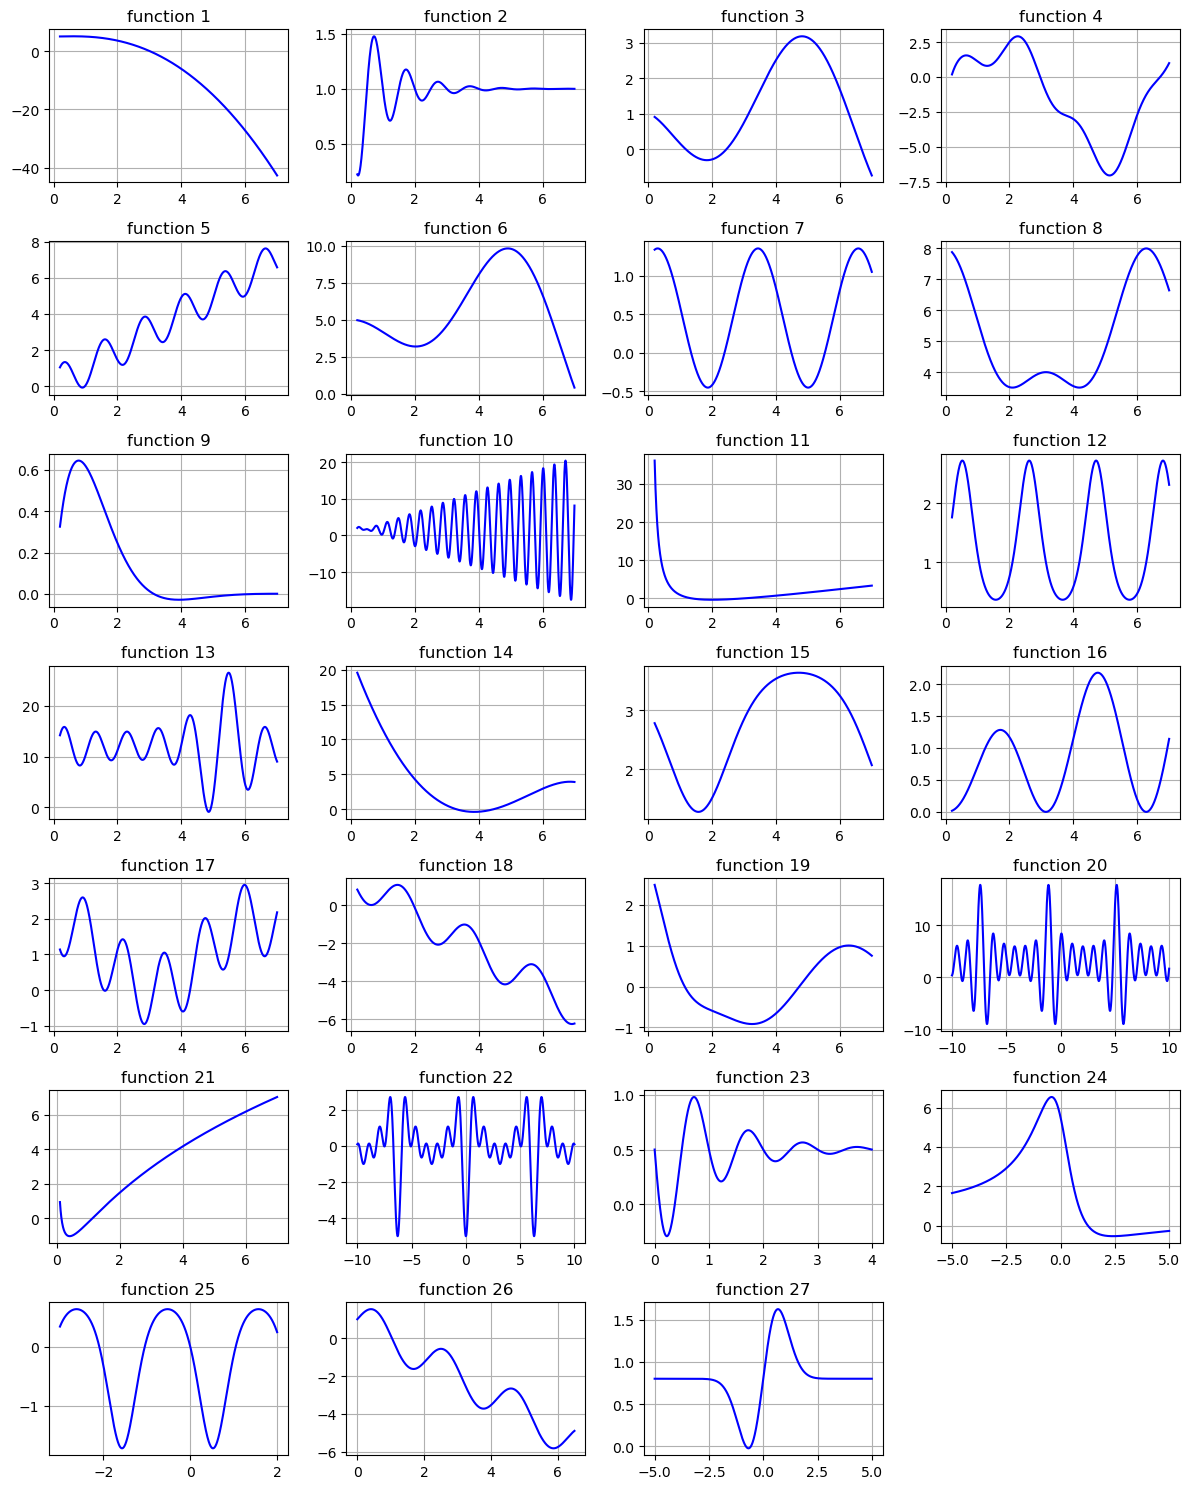

In [15]:
import matplotlib.pyplot as plt

cols = 4
fig, axes = plt.subplots(7, cols, figsize=(12, 15))


def sub_plot_problem(prob, tips, npoints=1000, legend=2):
    """
       Plots a problem
       
       Parameters
       ----------
       prob : UniVarProblem
           The problem to plot
       npoints : int
           number of points used to draw a plot
       """

    #     colors = ['r-', 'b-', 'g-', 'y-', 'm-', 'c-']
    step = (prob.b - prob.a) / npoints
    ta = np.arange(prob.a, prob.b + step, step)
    num_points = len(ta)
    fta = np.empty([num_points])

    for i in range(num_points):
        fta[i] = prob.objective(ta[i])
    lb = np.amin(fta)
    ub = np.amax(fta)
    d = (ub - lb) * 0.1
    ax.plot(ta, fta, tips['function'])
    # ax.ylim([lb - d - legend, ub + d])


for i, test in enumerate(df.itertuples()):
    ax = axes[i // cols, i % cols]
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x)
    sub_plot_problem(prob, {'function': 'b-'}, legend=legend_size)
    ax.set_title(f'function {i + 1}')
    ax.grid(True)

# for j in range(len(df.itertuples()), cols * 7):
fig.delaxes(axes.flatten()[27])

plt.tight_layout()
# plt.show()
plt.savefig('./all_funs.png', dpi=500)
